# Plotting Weather Patterns

A NOAA dataset has been located in the file *data/temperature_data.csv*. This will be used in this analysis project. This data is a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.  

The data is already tidy, as in every row represents a unique observation. Every column corresponds to a single data aspect of a certain observation.  

Dataset will contain temperature data for years 2005-2015.  

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

Dataset contains following variables: 

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)  

In this analysis, I will:

1. Plot a line graph depicting the record high and record low temperatures of each day of the year over the period of 2005-2014. Area between record high and low temperature lines will be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Create a nice visualization that is not misleading or confusing.

**I will be removing leap days(29th of February)**

In [4]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as dates

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/data_for_map.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200) 
    
    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [5]:
# Importing temperature data
df = pd.read_csv('data/temperature_data.csv')
df.head()

Unnamed: 0           ID        Date Element  Data_Value
0           0  USW00094889  2014-11-12    TMAX          22
1           1  USC00208972  2009-04-29    TMIN          56
2           2  USC00200032  2008-05-26    TMAX         278
3           3  USC00205563  2005-11-11    TMAX         139
4           4  USC00200230  2014-02-27    TMAX        -106

In [6]:
import datetime 

# Converting 'Date' column data into python datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Creating a separate column for Year
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Creating a separate column for day and month
df['Day&Month'] = df['Date'].dt.strftime('%m/%d')

# Getting rid of leap days(29th of Feb)
df = df.loc[df['Day&Month'] != '02/29']

# Creating a new column for temperature
df['Temperature'] = df['Data_Value']/10.0

# Removing unnecessary columns 'Date' and 'Data_Value'
df = df.drop('Date', axis=1)
df = df.drop('Data_Value', axis=1)

df.head()

Unnamed: 0           ID Element  Year Day&Month  Temperature
0           0  USW00094889    TMAX  2014     11/12          2.2
1           1  USC00208972    TMIN  2009     04/29          5.6
2           2  USC00200032    TMAX  2008     05/26         27.8
3           3  USC00205563    TMAX  2005     11/11         13.9
4           4  USC00200230    TMAX  2014     02/27        -10.6

In [7]:
# Formatted dataset
df = df.sort_values(['Day&Month', 'Year', 'ID'], ascending=True)
df.head()

Unnamed: 0           ID Element  Year Day&Month  Temperature
55067       55067  USC00200032    TMIN  2005     01/01         -2.8
55102       55102  USC00200032    TMAX  2005     01/01          6.7
49823       49823  USC00200228    TMAX  2005     01/01         15.0
49827       49827  USC00200228    TMIN  2005     01/01         -3.9
35771       35771  USC00200230    TMAX  2005     01/01         12.2

In [8]:
# Converting Day and Month into date type
df['Day&Month'] = pd.to_datetime(df['Day&Month'], format='%m/%d')

# Subsetting data from years 2005-2014
df1 = df.loc[df['Year'] < 2015]
df1.head()

Unnamed: 0           ID Element  Year  Day&Month  Temperature
55067       55067  USC00200032    TMIN  2005 1900-01-01         -2.8
55102       55102  USC00200032    TMAX  2005 1900-01-01          6.7
49823       49823  USC00200228    TMAX  2005 1900-01-01         15.0
49827       49827  USC00200228    TMIN  2005 1900-01-01         -3.9
35771       35771  USC00200230    TMAX  2005 1900-01-01         12.2

In [9]:
# Groupby Day&Month, take min and max values for each day
pre2015 = df1.groupby('Day&Month')['Temperature'].agg(['min', 'max']).reset_index()
pre2015.head()

Day&Month   min   max
0 1900-01-01 -16.0  15.6
1 1900-01-02 -26.7  13.9
2 1900-01-03 -26.7  13.3
3 1900-01-04 -26.1  10.6
4 1900-01-05 -15.0  12.8

In [10]:
# Create x variable for plotting
pre2015['xvals'] = pre2015['Day&Month'].apply(lambda x: dates.date2num(x))
# Above function will set the year to 1990, but it will be okay as it will be formatted out later.
pre2015.head()

Day&Month   min   max     xvals
0 1900-01-01 -16.0  15.6  693596.0
1 1900-01-02 -26.7  13.9  693597.0
2 1900-01-03 -26.7  13.3  693598.0
3 1900-01-04 -26.1  10.6  693599.0
4 1900-01-05 -15.0  12.8  693600.0

In [11]:
# Subsetting data for year 2015
df2 = df.loc[df['Year'] == 2015]

# Group by dates and finding min and max for each date
y2015 = df2.groupby('Day&Month')['Temperature'].agg(['min', 'max']).reset_index()
y2015.columns = ['Day&Month', 'min2015', 'max2015']
y2015.head()

Day&Month  min2015  max2015
0 1900-01-01    -13.3      1.1
1 1900-01-02    -12.2      3.9
2 1900-01-03     -6.7      3.9
3 1900-01-04     -8.8      4.4
4 1900-01-05    -15.5      2.8

In [12]:
# Merging datasets for pre2015 and year 2015 to compare them

hAndL2015 = pd.merge(pre2015, y2015, how = 'outer', left_on = 'Day&Month', right_on = 'Day&Month')
hAndL2015.head()

Day&Month   min   max     xvals  min2015  max2015
0 1900-01-01 -16.0  15.6  693596.0    -13.3      1.1
1 1900-01-02 -26.7  13.9  693597.0    -12.2      3.9
2 1900-01-03 -26.7  13.3  693598.0     -6.7      3.9
3 1900-01-04 -26.1  10.6  693599.0     -8.8      4.4
4 1900-01-05 -15.0  12.8  693600.0    -15.5      2.8

In [13]:
# Checking whether the min and max temperatures from pre 2015 are extreme than 2015
hAndL2015['is_2015_extreme_min'] = hAndL2015['min2015'] < hAndL2015['min']
hAndL2015['is_2015_extreme_max'] = hAndL2015['max2015'] > hAndL2015['max']

# Removing records that any value(min or max) are not extrme
pointsMin2015 = hAndL2015.loc[hAndL2015['is_2015_extreme_min'] == True]
pointsMax2015 = hAndL2015.loc[hAndL2015['is_2015_extreme_max'] == True]
pointsMax2015.head()

Day&Month   min   max     xvals  min2015  max2015  is_2015_extreme_min  \
39  1900-02-09 -21.0   7.8  693635.0    -11.6      8.3                False   
106 1900-04-17  -8.9  24.4  693702.0      4.4     27.8                False   
126 1900-05-07  -2.8  25.6  693722.0      8.3     30.6                False   
127 1900-05-08   0.0  31.7  693723.0      8.9     33.3                False   
130 1900-05-11  -1.1  29.4  693726.0     13.3     30.6                False   

     is_2015_extreme_max  
39                  True  
106                 True  
126                 True  
127                 True  
130                 True

<IPython.core.display.Javascript object>


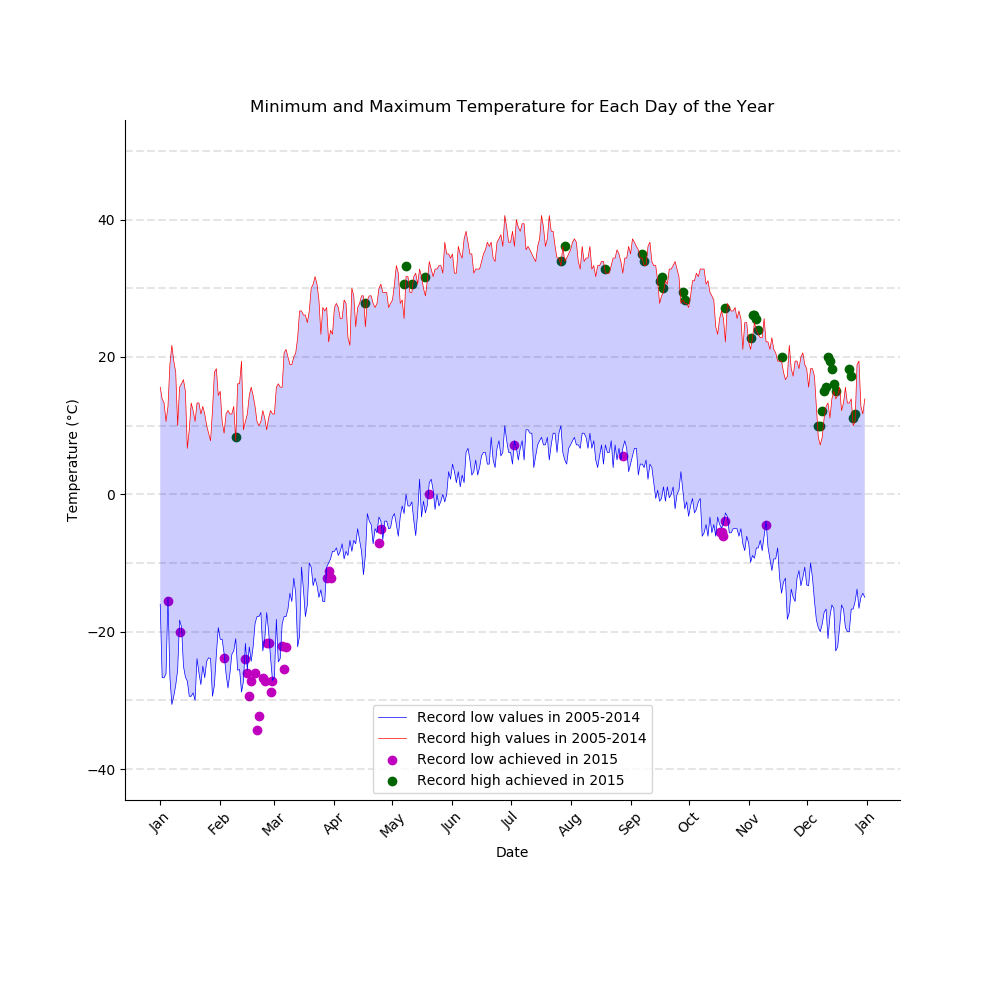

In [31]:
# Plotting
%matplotlib notebook

# New figure
plt.figure(figsize = (10,10))

# Plot record high and low from 2005 to 2014
plt.plot(pre2015['Day&Month'], pre2015['min'], color = 'b', lw = 0.5, label = 'Record low values in 2005-2014')
plt.plot(pre2015['Day&Month'], pre2015['max'], color = 'r', lw = 0.5, label = 'Record high values in 2005-2014')

# Scatterplot of record breaking 2015 low and high values
plt.scatter(pointsMin2015['Day&Month'].values, pointsMin2015['min2015'].values, color = 'm', marker = 'o', label = 'Record low achieved in 2015')
plt.scatter(pointsMax2015['Day&Month'].values, pointsMax2015['max2015'].values, color = 'darkgreen', marker = 'o', label = 'Record high achieved in 2015')

ax = plt.gca()

# Format x axis dates
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
plt.xticks(rotation = 45)

# Set x axis to show monthly ticks
ax.xaxis.set_major_locator(dates.MonthLocator())

# Remove spines in top and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set labels
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Minimum and Maximum Temperature for Each Day of the Year')

# Filling the space between
plt.gca().fill_between(pre2015['xvals'], 
                       pre2015['min'], pre2015['max'], 
                       facecolor='blue', alpha = 0.2)
# Format positioning
plt.subplots_adjust(bottom=0.2)

# Add the legend
plt.legend(loc = 'lower center')

# Adding horizontal lines to make the plot more readable
yts = plt.gca().get_yticks()
for yt in yts:
    plt.axhline(yt, color = 'k', linestyle = '--', alpha = 0.1)

plt.show()

In [32]:
# Save the plot
plt.savefig('images/plot_new.png', format = 'png')